In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

SAVE_PATH = "M4-T4-P10-N/"
figsize = (14, 10)

In [8]:
# Algorithm taken from https://arxiv.org/abs/1902.09630, Generalized Intersection over Union: A Metric and 
# A Loss for Bounding Box Regression, Hamid Rezatofighi, Nathan Tsoi, JunYoung Gwak, Amir Sadeghian, Ian Reid, 
# Silvio Savarese


def get_iou(a, b, epsilon=1e-5):
    """ Given two boxes `a` and `b` defined as a list of four numbers:
            [x1,y1,x2,y2]
        where:
            x1,y1 represent the lower left corner
            x2,y2 represent the upper right corner
        It returns the Intersect of Union score for these two boxes.

    Args:
        a:          (list of 4 numbers) [x1,y1,x2,y2]
        b:          (list of 4 numbers) [x1,y1,x2,y2]
        epsilon:    (float) Small value to prevent division by zero

    Returns:
        (float) The Intersect of Union score.
    """
    
    # For the prediction box a
    x1_hat = min(a[0], a[2])
    x2_hat = max(a[0], a[2])
    y1_hat = min(a[1], a[3])
    y2_hat = max(a[1], a[3])
    
    # Calculation intersection between prediction box and groundtruth box
    x1_int = max(x1_hat, b[0])
    y1_int = max(y1_hat, b[1])
    x2_int = min(x2_hat, b[2])
    y2_int = min(y2_hat, b[3])
    
    # Handle case where there is no overlap
    if x2_int <= x1_int or y2_int <= y1_int:
        return 0.0
    
    # AREA OF OVERLAP - Area where the boxes intersect
    width = (x2_int - x1_int)
    height = (y2_int - y1_int)
    area_overlap = width * height

    # Combined area
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    area_combined = area_a + area_b - area_overlap

    # Ration of area of overlap over combined area
    iou = area_overlap / (area_combined+epsilon)
    return iou


boxA = [1, 1, 4, 4]
boxB = [0, 0, 3, 3]
get_iou(boxA, boxB)

0.2857140816327988

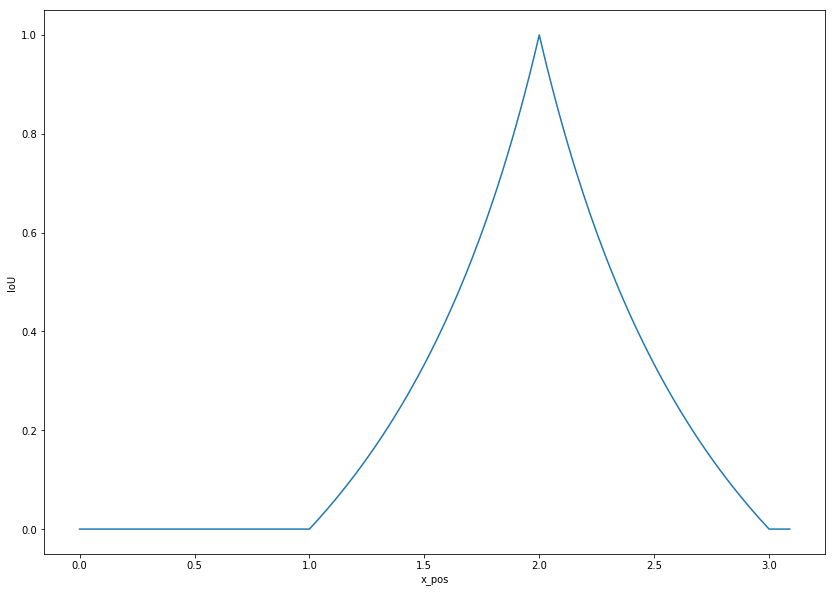

In [3]:
groundtruth = [2, 2, 3, 3]

x_pos = []
y_pos = 2
IoU = []

for x in [x * 0.01 for x in range(0, 310)]:
    x = round(x, 2)
    x_pos.append(x)
    
    IoU.append(get_iou([x, y_pos, round(x+1, 2), y_pos + 1], groundtruth))
    
d = {'x_pos': x_pos, "IoU": IoU}
iou_df = pd.DataFrame(data=d)
fig, ax = plt.subplots(figsize=figsize)
ax = sns.lineplot(iou_df.x_pos, iou_df.IoU)
fig.savefig(SAVE_PATH + "IoU_1Dexample.png")

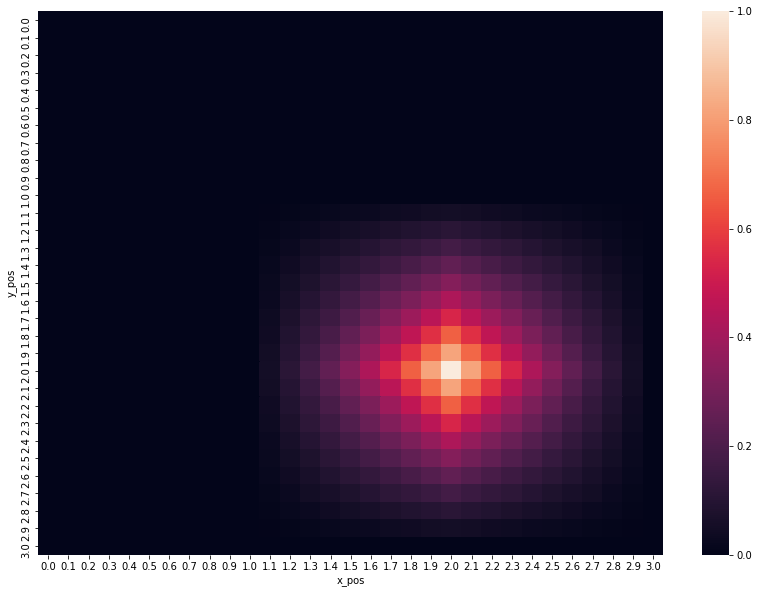

In [4]:
# Dataframe should be on the form y_pos, x_pos, IoU
# All boxes are 1x1 and step size is 0.1

x_pos = []
y_pos = []
IoU = []

for y in [x * 0.1 for x in range(0, 31)]:
    for x in [x * 0.1 for x in range(0, 31)]:
        y = round(y, 1)
        x = round(x, 1)
        x_pos.append(x)
        y_pos.append(y)
        IoU.append(get_iou([x, y, round(x+1, 1), round(y+1, 1)], groundtruth))

d = {'y_pos': y_pos, 'x_pos': x_pos, "IoU": IoU}
iou_df = pd.DataFrame(data=d)
iou_df = iou_df.pivot("y_pos", "x_pos", "IoU")

fig, ax = plt.subplots(figsize=figsize)
ax = sns.heatmap(iou_df)
fig.savefig(SAVE_PATH + "IoU_2Dexample.png")

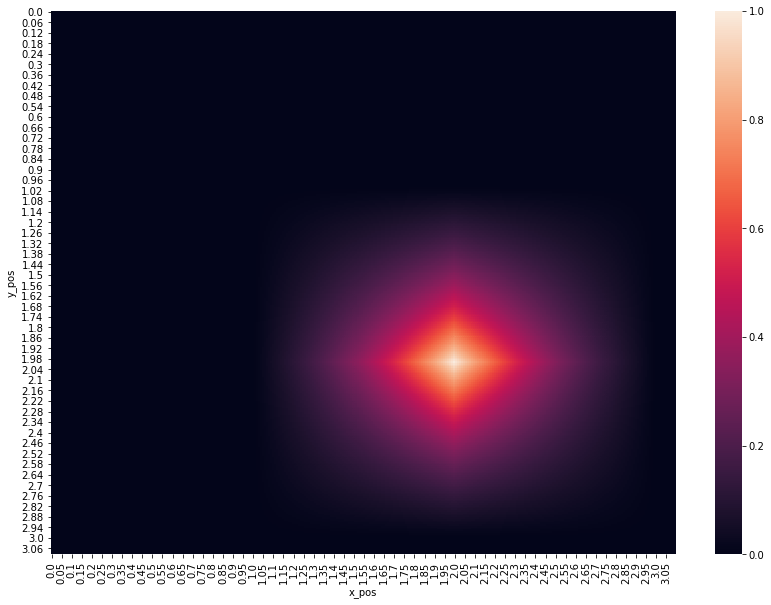

In [5]:
x_pos = []
y_pos = []
IoU = []

for y in [x * 0.01 for x in range(0, 310)]:
    for x in [x * 0.01 for x in range(0, 310)]:
        y = round(y, 2)
        x = round(x, 2)
        x_pos.append(x)
        y_pos.append(y)
        IoU.append(get_iou([x, y, round(x+1, 2), round(y+1, 2)], groundtruth))

d = {'y_pos': y_pos, 'x_pos': x_pos, "IoU": IoU}
iou_df = pd.DataFrame(data=d)
iou_df = iou_df.pivot("y_pos", "x_pos", "IoU")

fig, ax = plt.subplots(figsize=figsize)
ax = sns.heatmap(iou_df)
fig.savefig(SAVE_PATH + "IoU_2Dexample_higher_res.png")

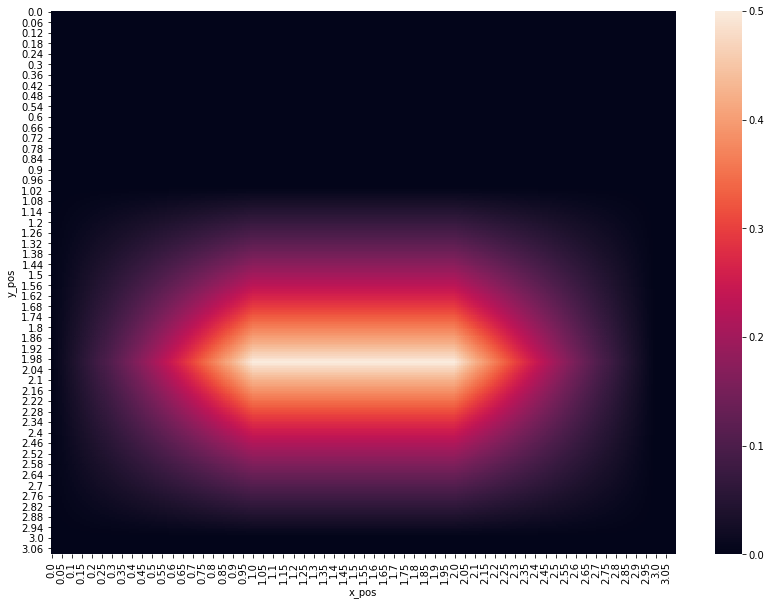

In [6]:
x_pos = []
y_pos = []
IoU = []

for y in [x * 0.01 for x in range(0, 310)]:
    for x in [x * 0.01 for x in range(0, 310)]:
        y = round(y, 2)
        x = round(x, 2)
        x_pos.append(x)
        y_pos.append(y)
        IoU.append(get_iou([x, y, round(x+2, 2), round(y+1, 2)], groundtruth))

d = {'y_pos': y_pos, 'x_pos': x_pos, "IoU": IoU}
iou_df = pd.DataFrame(data=d)
iou_df = iou_df.pivot("y_pos", "x_pos", "IoU")

fig, ax = plt.subplots(figsize=figsize)
ax = sns.heatmap(iou_df)
fig.savefig(SAVE_PATH + "IoU_2Dexample_higher_res_too_big.png")

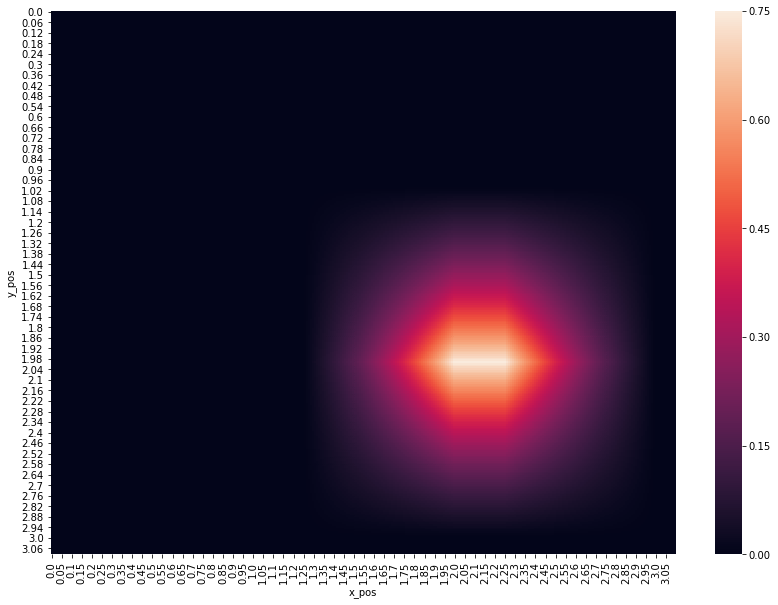

In [7]:
x_pos = []
y_pos = []
IoU = []

for y in [x * 0.01 for x in range(0, 310)]:
    for x in [x * 0.01 for x in range(0, 310)]:
        y = round(y, 2)
        x = round(x, 2)
        x_pos.append(x)
        y_pos.append(y)
        IoU.append(get_iou([x, y, round(x+0.75, 2), round(y+1, 2)], groundtruth))

d = {'y_pos': y_pos, 'x_pos': x_pos, "IoU": IoU}
iou_df = pd.DataFrame(data=d)
iou_df = iou_df.pivot("y_pos", "x_pos", "IoU")

fig, ax = plt.subplots(figsize=figsize)
ax = sns.heatmap(iou_df)
fig.savefig(SAVE_PATH + "IoU_2Dexample_higher_res_too_small.png")